In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

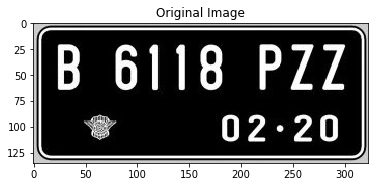

In [2]:
image = cv2.imread('modul7.jpg')

plt.imshow(image)
plt.title("Original Image")
plt.show()

In [3]:
kernel = np.ones((3, 3), np.uint8)

erosi

In [4]:
def erode(img, element):
    ksize = element.shape[0]
    height,width = img.shape[:2]
    
    border = ksize//2

    # Threshold image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
    ret,img = cv2.threshold(img,127, 255, cv2.THRESH_BINARY)
    
    # Create a padded image with zeros padding
    paddedImg = np.full((height + border*2, width + border*2), 255)
    paddedImg = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_CONSTANT, value = 255)
    for height_i in range(border, height + border):
        for width_i in range(border, width + border):
            # When you find a black pixel
            if img[height_i - border, width_i - border] == 0:
                paddedImg[ height_i - border : (height_i + border)+1, width_i - border : (width_i + border)+1] = \
                        cv2.bitwise_and(paddedImg[height_i - border : (height_i + border)+1, width_i - border : (width_i + border)+1], element)
    return paddedImg[border : height + border, border : width + border]

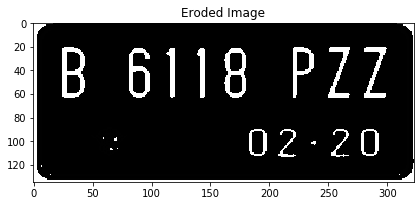

In [6]:
imageEroded = erode(image, kernel)

plt.figure(figsize=[15,15])
plt.subplot(122)
plt.imshow(imageEroded, cmap='gray')
plt.title("Eroded Image");
plt.show()

dilatasi

In [6]:
def dilate(img, element):
    ksize = element.shape[0]
    height,width = img.shape[:2]

    border = ksize//2
    # Threshold image
    
    if(len(img.shape) > 2):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
    ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

    # Create a padded image with zeros padding
    paddedImg = np.zeros((height + border*2, width + border*2))
    paddedImg = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
    for height_i in range(border, height + border):
        for width_i in range(border, width + border):
            # When you find a white pixel
            if img[height_i - border, width_i - border] == 255:
                paddedImg[height_i - border : (height_i + border)+1, width_i - border : (width_i + border)+1] = 255
    return paddedImg[border : height + border, border : width + border] 

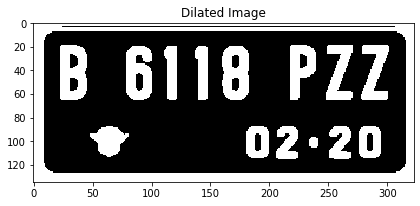

In [7]:
imageDilated = dilate(image, kernel)

plt.figure(figsize=[15,15])
plt.subplot(122)
plt.imshow(imageDilated, cmap='gray')
plt.title("Dilated Image")
plt.show()

opening

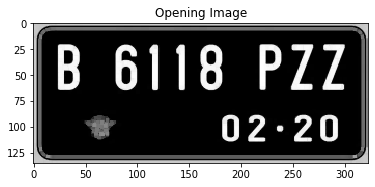

In [8]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening)
plt.title("Opening Image")
plt.show()

closing

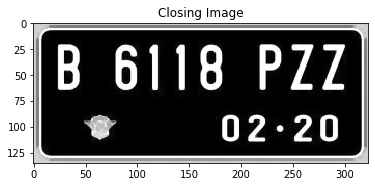

In [9]:
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing)
plt.title("Closing Image")
plt.show()